In [6]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [19]:
from datetime import datetime

def parse(x):
    return datetime.strptime(x, "%m/%d/%Y")


In [20]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YoutubeLI/master/dataset/amazon_revenue_profit.csv", parse_dates = ['Quarter'],date_parser = parse)

C:\Users\thaku\AppData\Local\Temp\ipykernel_22972\2950908628.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YoutubeLI/master/dataset/amazon_revenue_profit.csv", parse_dates = ['Quarter'],date_parser = parse)


In [21]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


<Axes: xlabel='Quarter'>

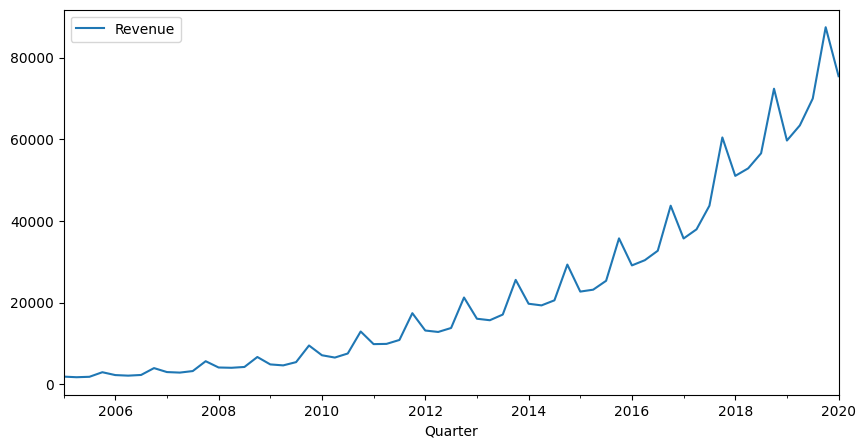

In [23]:
df.plot(x = 'Quarter',y ='Revenue',figsize = (10,5))

### kpss

In [24]:
from statsmodels.tsa.stattools import kpss

In [26]:
stats, p, lags, critical_values = kpss(df['Revenue'], 'ct')
## ct shows we have a trend component

C:\Users\thaku\AppData\Local\Temp\ipykernel_22972\2221782360.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(df['Revenue'], 'ct')


In [28]:
print(f"test statistics ,{stats}")
print(f"p values ,{p}")
print(f"critical values, {critical_values}")

if p < 0.05:
    # null hypothesis fails
    print("series is not stationary")
else:
    print("stationary series")

test statistics ,0.30665545975169417
p values ,0.01
critical values, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
series is not stationary


In [29]:
lags

4

### adf test

In [31]:
## try both tests in some cases

In [32]:
from statsmodels.tsa.stattools import adfuller

In [35]:
result = adfuller(df['Revenue'])

In [38]:
print(f"test statistics ,{result[0]}")
print(f"p values ,{result[1]}")
print(f"critical values, {result[4]}")

if result[1] > 0.05:
    # null hypothesis fails
    print("series is not stationary")
else:
    print("stationary series")

test statistics ,-2.44483603819723
p values ,0.1294794312183885
critical values, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
series is not stationary
